In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## 不等宽柱形图

In [7]:
mydata = pd.DataFrame({
    "Name": ["Project 1", "Project 2", "Project 3", "Project 4", "Project 5"],
    "Scale": [35, 30, 20, 10, 15],
    "ARPU": [56, 37, 63, 57, 59]
})
mydata["xmin"] = 0
for i in range(1, 5):
    mydata["xmin"][i] = np.sum(mydata["Scale"][0:i])
mydata["xmax"] = 0
for i in range(0, 5):
    mydata["xmax"][i] = np.sum(mydata["Scale"][0:i+1])
mydata["label"] = 0
for i in range(0, 5):
    mydata["label"][i] = np.sum(mydata["Scale"][0:i+1]) - mydata["Scale"][i] / 2
mydata

/Users/zfwang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zfwang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/zfwang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,Name,Scale,ARPU,xmin,xmax,label
0,Project 1,35,56,0,35,17
1,Project 2,30,37,35,65,50
2,Project 3,20,63,65,85,75
3,Project 4,10,57,85,95,90
4,Project 5,15,59,95,110,102


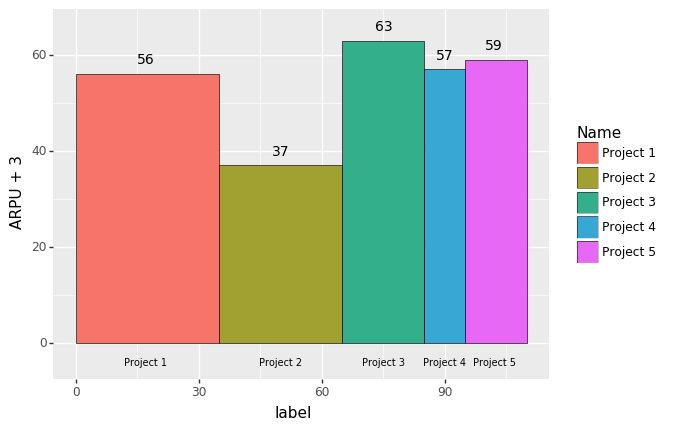

<ggplot: (8764955076401)>

In [19]:
base_plot = (
    ggplot(mydata) +
        geom_rect(aes(xmin = "xmin", xmax = "xmax", ymin = 0, ymax = "ARPU", fill = "Name"), colour = "black", size = 0.25) +
        geom_text(aes(x = "label", y = "ARPU + 3", label = "ARPU"), size = 10, colour = "black") +
        geom_text(aes(x = "label", y = -4, label = "Name"), size = 7, colour = "black") +
        scale_fill_hue(s = 0.90, l = 0.65, h = 0.0417, color_space = "husl")
)
base_plot